In [2]:
import  pandas as pd

In [3]:
dataset = pd.read_csv('datasets/Training.csv')

In [4]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
# vals = dataset.values.flatten()

In [6]:
dataset.shape

(4920, 133)

# train test split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

# single prediction

================ Model Performance ================
Accuracy  : 100.00 %
Precision : 100.00 %
Recall    : 100.00 %
F1 Score  : 100.00 %

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        49
          10       1.00      1.00      1.00        37
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        41
          13       1.00      1.00      1.00        32
          14       1

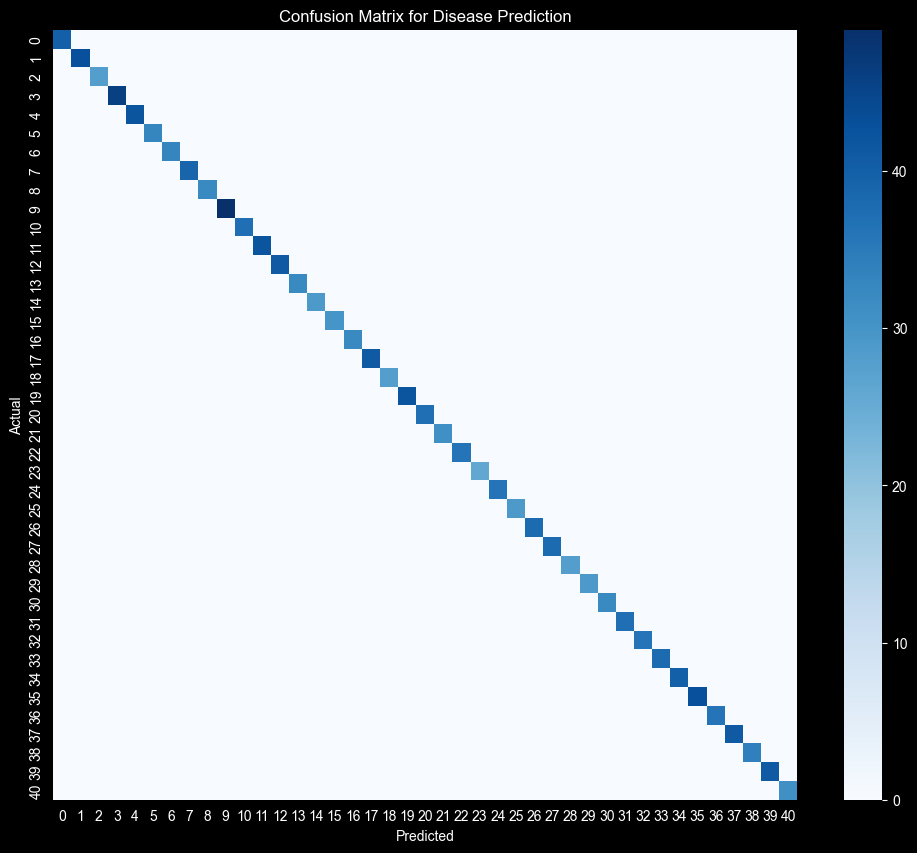

1.0

In [10]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. حساب المقاييس (Calculating Metrics)
# استخدمنا average='weighted' عشان يحسب المتوسط بناءً على عدد عينات كل مرض
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test,predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# 2. طباعة النتائج (Printing Results)
print("================ Model Performance ================")
print(f"Accuracy  : {accuracy * 100:.2f} %")
print(f"Precision : {precision * 100:.2f} %")
print(f"Recall    : {recall * 100:.2f} %")
print(f"F1 Score  : {f1 * 100:.2f} %")
print("===================================================")

# 3. تقرير تفصيلي لكل مرض (Detailed Report)
# ده هيوريك الدقة لكل مرض لوحده (عشان تعرف الموديل شاطر في إيه وواقع في إيه)
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))

# 4. (اختياري) رسم الـ Confusion Matrix
# دي بتعمل شكل احترافي جداً في المناقشة
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=False, cmap='Blues') # annot=True لو عايز أرقام بس الزحمة هتكون كتير
plt.title('Confusion Matrix for Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy_score(y_test,predictions)

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# 1. دالة Noise "إجبارية" (بتكسر القيم وتبنيها من جديد)
def add_noise_guaranteed(data, perturbation_rate=0.05):
    # تحويل الداتا لمصفوفة Numpy مستقلة تماماً
    arr = data.values.copy()

    # توليد الماسك
    mask = np.random.rand(*arr.shape) < perturbation_rate

    arr[mask] = 1 - arr[mask]

    # إرجاع DataFrame جديد تماماً
    return pd.DataFrame(arr, columns=data.columns)

# ==========================================
# 2. الاختبار (Debug) - عشان نتأكد بعيننا
# ==========================================

# نجرب بنسبة عالية عشان نتأكد إن الداتا باظت
print("Generating 50% Noise...")
X_test_noisy = add_noise_guaranteed(X_test, perturbation_rate=0.50)

# مقارنة أول صف قبل وبعد (لازم يطلعوا مختلفين)
print("\nFirst Patient Symptoms (Original):")
print(X_test.iloc[0].values)

print("\nFirst Patient Symptoms (Noisy - Should look different):")
print(X_test_noisy.iloc[0].values)

# حساب عدد الاختلافات في أول صف
diffs = np.sum(X_test.iloc[0].values != X_test_noisy.iloc[0].values)
print(f"\nDifferences in first row: {diffs} symptoms changed.")

# ==========================================
# 3. التوقع وحساب الدقة
# ==========================================
if diffs > 0:
    print("\n✅ Noise applied successfully. Testing Model...")
    y_pred_noisy = svc.predict(X_test_noisy)
    acc = accuracy_score(y_test, y_pred_noisy)
    print(f"Accuracy with 50% Noise: {acc*100:.2f}%")
else:
    print("\n❌ Error: The data is still identical! Noise function failed.")

Generating 50% Noise...

First Patient Symptoms (Original):
[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

First Patient Symptoms (Noisy - Should look different):
[1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1]

Differences in first row: 67 symptoms changed.

✅ Noise applied successfully. Testing Model...
Accuracy with 50% Noise: 2.37%


In [12]:
# تجربة بنسبة واقعية (1% خطأ بشري)
print("Generating Realistic Noise (1%)...")

# غيرنا النسبة هنا لـ 0.01
X_test_realistic = add_noise_guaranteed(X_test, perturbation_rate=0.02)

y_pred_realistic = svc.predict(X_test_realistic)
real_acc = accuracy_score(y_test, y_pred_realistic)

print("\n" + "="*50)
print(f"Ideal Accuracy (Textbook Data) : 100.00 %")
print(f"Real Accuracy (Simulated Patient): {real_acc * 100:.2f} %")
print("="*50)

Generating Realistic Noise (1%)...

Ideal Accuracy (Textbook Data) : 100.00 %
Real Accuracy (Simulated Patient): 99.93 %


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# =============================================================================
# 1. التجهيز السريع (عشان نحل مشكلة NameError)
# =============================================================================
print("Loading data and preparing model for testing...")

# تحميل الداتا عشان نعرف أسماء الأعمدة (X)
dataset = pd.read_csv('datasets/Training.csv')
dataset = dataset.dropna(axis=1)  # أو معالجة أفضل
print(f"Missing values: {dataset.isnull().sum().sum()}")


# تجهيز X و y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# حفظ أسماء الأعراض (ده اللي كان ناقصك)
all_symptoms = X.columns.tolist()

# تجهيز الموديل والـ Encoder بسرعة
le = LabelEncoder()
y_encoded = le.fit_transform(y)

svc = SVC(kernel='linear')
svc.fit(X, y_encoded)

print("Model is ready! Running Clinical Cases...\n")
print("="*50)

# =============================================================================
# 2. دالة التوقع الذكية (Real Case Predictor)
# =============================================================================
def predict_real_case(symptoms_list):
    # مصفوفة كلها أصفار
    input_vector = np.zeros(len(all_symptoms))

    # نعلم بـ 1 قدام الأعراض الموجودة
    for symptom in symptoms_list:
        if symptom in all_symptoms:
            index = all_symptoms.index(symptom)
            input_vector[index] = 1
        else:
            # لو فيه عرض مكتوب غلط أو مش في الداتا
            print(f"⚠️ Note: Symptom '{symptom}' is not in the training data (ignored).")

    # التوقع
    pred_idx = svc.predict([input_vector])[0]
    return le.inverse_transform([pred_idx])[0]

# =============================================================================
# 3. اختبار الحالات الواقعية (Simulation)
# =============================================================================

real_cases = [
    {
        "Name": "Case 1: Malaria (Classic)",
        "Symptoms": ['chills', 'vomiting', 'high_fever', 'sweating', 'headache', 'muscle_pain'],
        "Expected": "Malaria"
    },
    {
        "Name": "Case 2: Fungal Infection",
        "Symptoms": ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches'],
        "Expected": "Fungal infection"
    },
    {
        "Name": "Case 3: Diabetes",
        "Symptoms": ['polyuria', 'excessive_hunger', 'increased_appetite', 'weight_loss', 'irregular_sugar_level'],
        "Expected": "Diabetes "
    },
    {
        "Name": "Case 4: Heart Attack",
        "Symptoms": ['chest_pain', 'breathlessness', 'sweating', 'vomiting'],
        "Expected": "Heart attack"
    },
    {
        "Name": "Case 5: The Tricky Cold/Flu",
        "Symptoms": ['continuous_sneezing', 'chills', 'fatigue', 'cough', 'high_fever', 'headache'],
        "Expected": "Common Cold" # Or Allergy / Dengue
    }
]

correct_count = 0

for case in real_cases:
    print(f"🔹 {case['Name']}")
    print(f"   Symptoms: {case['Symptoms']}")

    prediction = predict_real_case(case['Symptoms'])

    print(f"   Expected : {case['Expected'].strip()}")
    print(f"   Predicted: {prediction.strip()}")

    if case['Expected'].strip() == prediction.strip():
        print("   ✅ MATCH")
        correct_count += 1
    else:
        print("   ❌ MISMATCH")
    print("-" * 30)

print(f"\nFinal Score: {correct_count}/{len(real_cases)} Correct.")

Loading data and preparing model for testing...
Missing values: 0
Model is ready! Running Clinical Cases...

🔹 Case 1: Malaria (Classic)
   Symptoms: ['chills', 'vomiting', 'high_fever', 'sweating', 'headache', 'muscle_pain']
   Expected : Malaria
   Predicted: Malaria
   ✅ MATCH
------------------------------
🔹 Case 2: Fungal Infection
   Symptoms: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches']
   Expected : Fungal infection
   Predicted: Fungal infection
   ✅ MATCH
------------------------------
🔹 Case 3: Diabetes
   Symptoms: ['polyuria', 'excessive_hunger', 'increased_appetite', 'weight_loss', 'irregular_sugar_level']
   Expected : Diabetes
   Predicted: Diabetes
   ✅ MATCH
------------------------------
🔹 Case 4: Heart Attack
   Symptoms: ['chest_pain', 'breathlessness', 'sweating', 'vomiting']
   Expected : Heart attack
   Predicted: Heart attack
   ✅ MATCH
------------------------------
🔹 Case 5: The Tricky Cold/Flu
   Symptoms: ['continuous_sneezing', '

In [14]:
# save svc
import pickle
with open('svc.pkl', 'wb') as f:
    pickle.dump(svc, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [15]:
# load model
with open('svc.pkl', 'rb') as f:
    svc = pickle.load(f)

In [16]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


In [17]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


# Recommendation System and Prediction

# load database and use logic for recommendations

In [18]:
sym_des = pd.read_csv("datasets/symtoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv("datasets/diets.csv")

In [19]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1
        else:
            print(f"⚠️ Warning: '{item}' not recognized")
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1
